In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Activation, Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

In [2]:
# Data Preparation
# Download and Save MNIST Dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Scale from 0 to 1
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

# Reshape from 28x28 matrix to 784 vector
train_x = np.reshape(train_x, (len(train_x), np.prod(train_x.shape[1:])))
test_x = np.reshape(test_x, (len(test_x), np.prod(test_x.shape[1:])))

11490434/11490434 [==============================] - 274s 24us/step


In [3]:
#Sigmoid & Cross-entropy
# Target Dimension
TARGET_DIM = 16

# Encoder
inputs = Input(shape=(784,))
h_encode = Dense(256, activation='relu')(inputs)
h_encode = Dense(128, activation='relu')(h_encode)
h_encode = Dense(64, activation='relu')(h_encode)
h_encode = Dense(32, activation='relu')(h_encode)

# Coded
encoded = Dense(TARGET_DIM, activation='relu')(h_encode)

# Decoder
h_decode = Dense(32, activation='relu')(encoded)
h_decode = Dense(64, activation='relu')(h_decode)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
outputs = Dense(784, activation='sigmoid')(h_decode)

# Autoencoder Model
autoencoder = Model(inputs=inputs, outputs=outputs)

# Encoder Model
encoder = Model(inputs=inputs, outputs=encoded)

# Optimizer / Update Rule
adam = Adam(lr=0.001)

# Compile the model Binary Crossentropy
autoencoder.compile(optimizer=adam, loss='binary_crossentropy')

# Train and Save weight
autoencoder.fit(train_x, train_x, batch_size=256, epochs=100, verbose=1, shuffle=True, validation_data=(test_x, test_x))
autoencoder.save_weights('weights.h5')

Epoch 1/100


c:\Users\ANDIKA WAHYU\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


235/235 [==============================] - 5s 16ms/step - loss: 0.2723 - val_loss: 0.2129
Epoch 2/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1831 - val_loss: 0.1615
Epoch 3/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1539 - val_loss: 0.1462
Epoch 4/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1422 - val_loss: 0.1374
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1346 - val_loss: 0.1308
Epoch 6/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1291 - val_loss: 0.1257
Epoch 7/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1252 - val_loss: 0.1230
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1223 - val_loss: 0.1205
Epoch 9/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1201 - val_loss: 0.1185
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1181 - val_loss

313/313 [==============================] - 0s 1ms/step


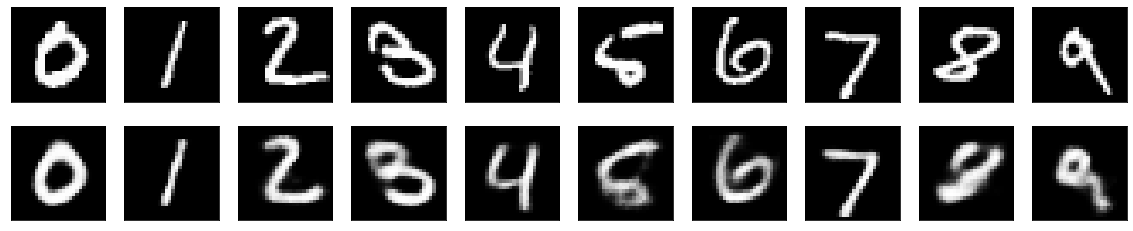

In [ ]:
#Reconstruction Result
# Encoded Data
encoded_train = encoder.predict(train_x)
encoded_test = encoder.predict(test_x)

# Reconstructed Data
reconstructed = autoencoder.predict(test_x)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
	count = 0
	while True:
		if i == test_y[count]:
			# Original
			ax = plt.subplot(2, n, i + 1)
			plt.imshow(test_x[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)

			# Reconstructed
			ax = plt.subplot(2, n, i + 1 + n)
			plt.imshow(reconstructed[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)
			break;

		count += 1
plt.show()

In [ ]:
#Linear & Mean Squared Error
TARGET_DIM = 16

# Encoder
inputs = Input(shape=(784,))
h_encode = Dense(256, activation='relu')(inputs)
h_encode = Dense(128, activation='relu')(h_encode)
h_encode = Dense(64, activation='relu')(h_encode)
h_encode = Dense(32, activation='relu')(h_encode)

# Coded
encoded = Dense(TARGET_DIM, activation='relu')(h_encode)

# Decoder
h_decode = Dense(32, activation='relu')(encoded)
h_decode = Dense(64, activation='relu')(h_decode)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
outputs = Dense(784, activation='linear')(h_decode)

# Autoencoder Model
autoencoder = Model(inputs=inputs, outputs=outputs)

# Encoder Model
encoder = Model(inputs=inputs, outputs=encoded)

# Optimizer / Update Rule
adam = Adam(lr=0.001)

# Compile the model Binary Crossentropy
autoencoder.compile(optimizer=adam, loss='mse')

autoencoder.fit(train_x, train_x, batch_size=256, epochs=100, verbose=1, shuffle=True, validation_data=(test_x, test_x))
autoencoder.save_weights('weightsLinear.h5')

Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0496 - val_loss: 0.0340
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0311 - val_loss: 0.0284
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0271 - val_loss: 0.0255
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0248 - val_loss: 0.0239
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0226 - val_loss: 0.0221
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0217 - val_loss: 0.0210
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0209 - val_loss: 0.0204
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0203 - val_loss: 0.0198
Epoch 10/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0197 - val_loss: 0.0192

313/313 [==============================] - 0s 1ms/step


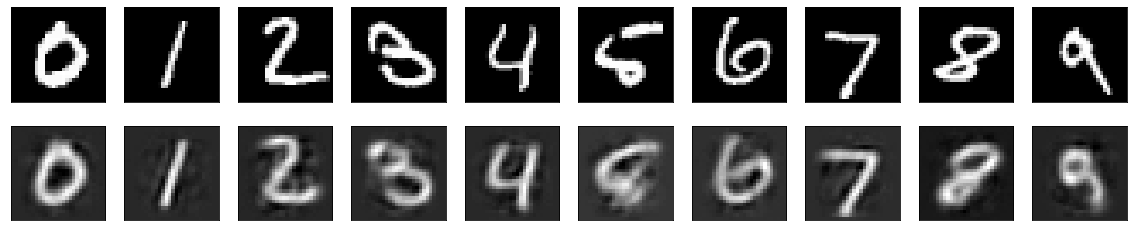

In [ ]:
#Reconstruction Result
# Encoded Data
encoded_train = encoder.predict(train_x)
encoded_test = encoder.predict(test_x)

# Reconstructed Data
reconstructed = autoencoder.predict(test_x)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
	count = 0
	while True:
		if i == test_y[count]:
			# Original
			ax = plt.subplot(2, n, i + 1)
			plt.imshow(test_x[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)

			# Reconstructed
			ax = plt.subplot(2, n, i + 1 + n)
			plt.imshow(reconstructed[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)
			break;

		count += 1
plt.show()